# EDA on Amazon Sales Dataset

## Section 1: Introduction & Setup

### 1. Import Necessary Libraries

This first step is to import the essential Python libraries for our data analysis. We will be using:
- **Pandas:** For data manipulation and reading CSV files.
- **NumPy:** For numerical operations.
- **Re:** For regular expressions, which will be useful for cleaning text data.
- **Matplotlib:** For creating static, animated, and interactive visualizations.

In [20]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Section 2: Data Loading & Initial Exploration

### 2. Load the Dataset

Here, we load the dataset from the `amazon.csv` file into a pandas DataFrame. This is the first step in any data analysis project, as it brings the data into our working environment.

In [21]:
df = pd.read_csv(r"datasets/amazon.csv")

### 3. Get an Overview of the Dataset

To get a first look at our data, we will use three important pandas functions:
- `df.head()`: Displays the first five rows of the DataFrame to give us a feel for the data.
- `df.info()`: Provides a concise summary of the DataFrame, including the data types of each column and the number of non-null values.
- `df.describe()`: Generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution.

In [22]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [24]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


### 4. Check for Missing Values

From the `.info()` output, we can observe that the `rating_count` column has 1463 non-null values, while there are 1465 entries in total. This indicates there are 2 missing values in that column. The `rating` column also appears to have one missing value after data type correction in a later step. We will address these missing values during the data cleaning phase.

## Section 3: Data Cleaning & Preprocessing

### 5. Handle Missing Values

In this project, the missing values are handled by dropping the respective rows. This is done using `df.dropna(axis=0)` in a later step, which removes all rows with any NaN values, ensuring our dataset is clean for analysis.

### 6. Correct Data Types

The `discounted_price`, `actual_price`, `discount_percentage`, and `rating_count` columns are currently of the object data type, as they contain characters like '₹', ',', and '%'. To perform numerical analysis, we need to convert them to a numeric type. The `extract_number` function is defined to clean these columns by removing non-numeric characters and converting them to floats.

In [27]:
def extract_number(df:pd.DataFrame , columns:list):
    def clean_and_convert(text):
        if isinstance(text, str):
            cleaned_text = re.sub(r'[₹,%]', '', text)
            try:
                return float(cleaned_text)
            except ValueError:
                return None
        return None
    
    for cols in columns:
        df[cols] = df[cols].apply(clean_and_convert)
    return df

df = extract_number(df,['discounted_price','actual_price','discount_percentage','rating_count'])
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [28]:
def wrong_data_to_Nan(df, col):
    def check_convert(text):
        if isinstance(text,str):
            try:
                return float(text)
            except ValueError:
                return np.nan
        return text
    df[col] = df[col].apply(check_convert)
    return df

df = wrong_data_to_Nan(df, 'rating')
df.to_csv(r"datasets/amazon_clean.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

### Data Cleaning

In [29]:
# Dropping Unnecessary Columns
df = df.drop(columns=['product_id','product_name','about_product','user_id','user_name','review_id','img_link','product_link','review_content'])
df.to_csv(r"datasets/amazon_clean.csv")

In [30]:
# Getting back missing discounted values from original price and discount percentage
nan_rows_disc_value = df['discounted_price'].isna()
nan_rows_actual_price = df.loc[nan_rows_disc_value, 'actual_price']
nan_rows_disc_perc = df.loc[nan_rows_disc_value, 'discount_percentage']

new_discounted_value = nan_rows_actual_price - (nan_rows_actual_price * nan_rows_disc_perc)//100
new_discounted_value.astype(float)

df.loc[nan_rows_disc_value, 'discounted_price'] = new_discounted_value
df.to_csv(r"datasets/amazon_clean.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             1465 non-null   object 
 1   discounted_price     1465 non-null   float64
 2   actual_price         1465 non-null   float64
 3   discount_percentage  1465 non-null   float64
 4   rating               1464 non-null   float64
 5   rating_count         1463 non-null   float64
 6   review_title         1465 non-null   object 
dtypes: float64(5), object(2)
memory usage: 80.2+ KB


## Section 4: Exploratory Data Analysis (EDA)

### Univariate Analysis

### 7. Analyze the Distribution of `rating`

We will start our univariate analysis by examining the distribution of product ratings. A histogram is a great tool for this, as it shows the frequency of ratings in different intervals. This will help us understand the overall customer satisfaction.

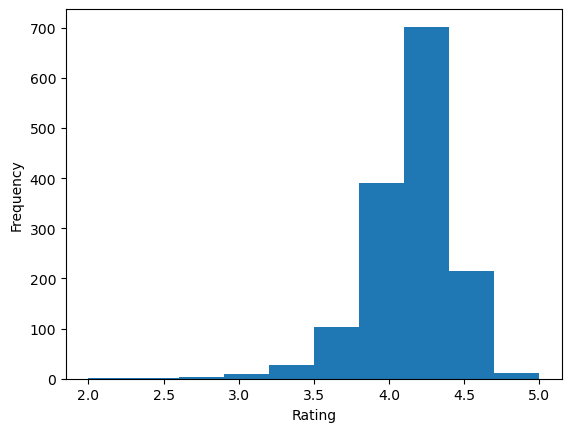

In [31]:
plt.hist(df['rating'])
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### 8. Analyze the Distribution of `discounted_price`

Next, we'll look at the distribution of discounted prices. A histogram will help us understand the price range of most products and identify if the data is skewed towards lower or higher prices.

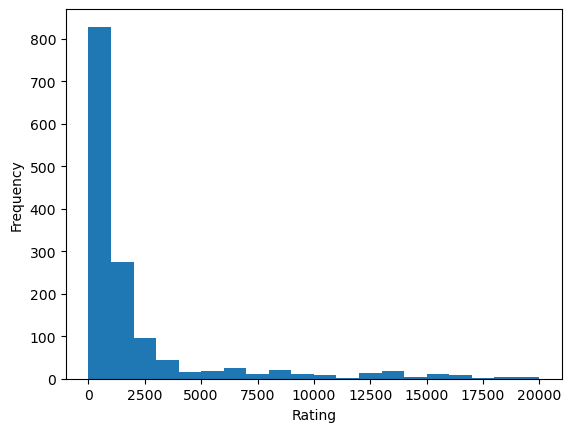

In [32]:
plt.hist(df['discounted_price'],bins=20,range=(0,20000))
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### 9. Analyze the Top Categories

To understand which product categories are most popular in the dataset, we will count the number of products in each category and visualize the top 10 using a bar plot. This will give us insights into the most represented categories on Amazon.

In [33]:
top_10 = list(df['category'].value_counts())[0:10]
top_10
category_top_10 = df['category'].value_counts()
category_top_10 = list(category_top_10.index)[0:10]

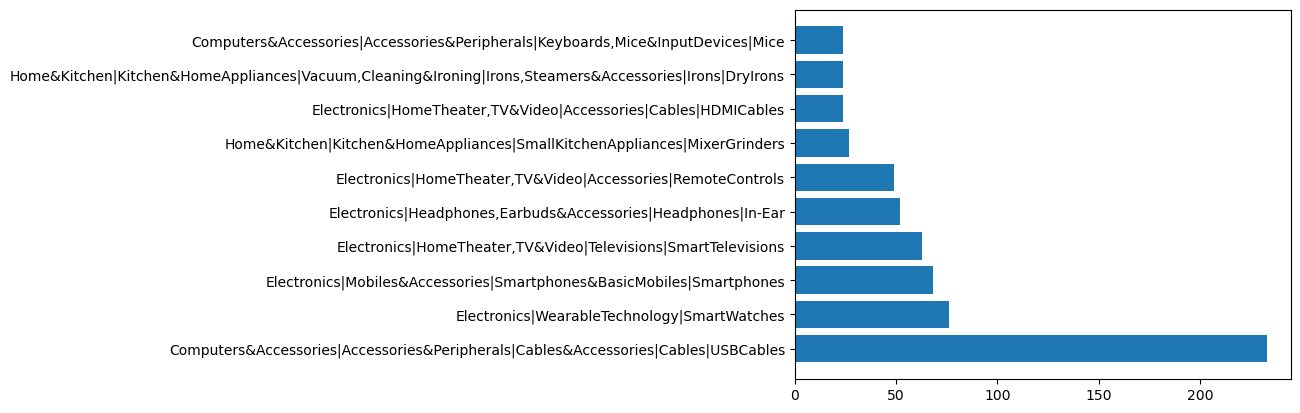

In [34]:
plt.barh(category_top_10,top_10)
plt.show()

In [35]:
df = df.dropna(axis=0)
df.to_csv(r"datasets/amazon_clean.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             1462 non-null   object 
 1   discounted_price     1462 non-null   float64
 2   actual_price         1462 non-null   float64
 3   discount_percentage  1462 non-null   float64
 4   rating               1462 non-null   float64
 5   rating_count         1462 non-null   float64
 6   review_title         1462 non-null   object 
dtypes: float64(5), object(2)
memory usage: 91.4+ KB


### Bivariate Analysis

### 10. Relationship between `rating` and `discounted_price`

Now we move to bivariate analysis. We will start by exploring the relationship between product ratings and their discounted prices. A scatter plot is a suitable visualization to see if there is any correlation between these two variables.

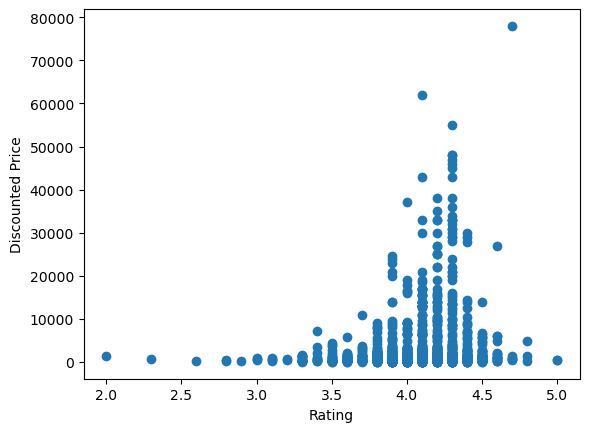

In [36]:
plt.scatter(df['rating'],df['discounted_price'])
plt.xlabel("Rating")
plt.ylabel("Discounted Price")
plt.show()

### 11. Relationship between `rating` and `discount_percentage`

Similarly, we will investigate the relationship between product ratings and the discount percentage offered. This scatter plot will help us determine if there is a trend suggesting that higher discounts correlate with higher or lower ratings.

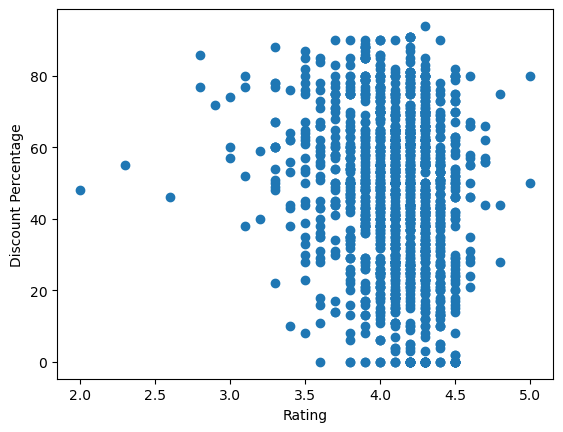

In [37]:
plt.scatter(df['rating'],df['discount_percentage'])
plt.xlabel("Rating")
plt.ylabel("Discount Percentage")
plt.show()

### Text Analysis

### 12. Word Cloud of `review_title`

Finally, we will perform some text analysis on the `review_title` column. A word cloud is an excellent way to visualize the most frequent words used in review titles, giving us a quick sense of the key terms and sentiments expressed by customers.

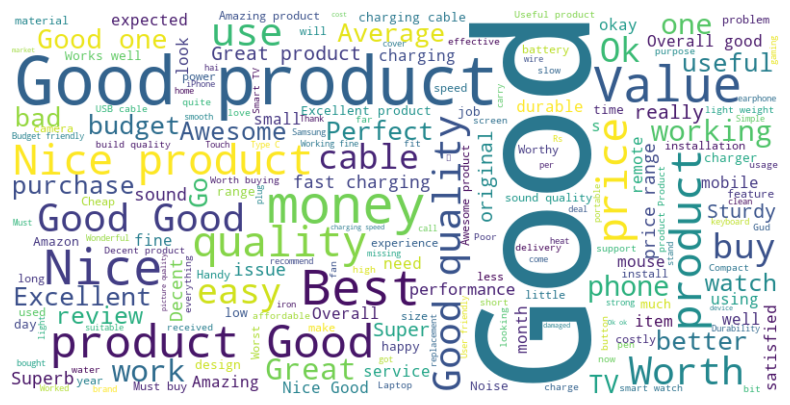

In [38]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(review for review in df['review_title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()